In [1]:
import micropip
await micropip.install("/bumps-demo/bumps-0.9.0-py3-none-any.whl")
await micropip.install("ipywidgets")
import numpy as np
import scipy
import matplotlib as mpl
import ipywidgets

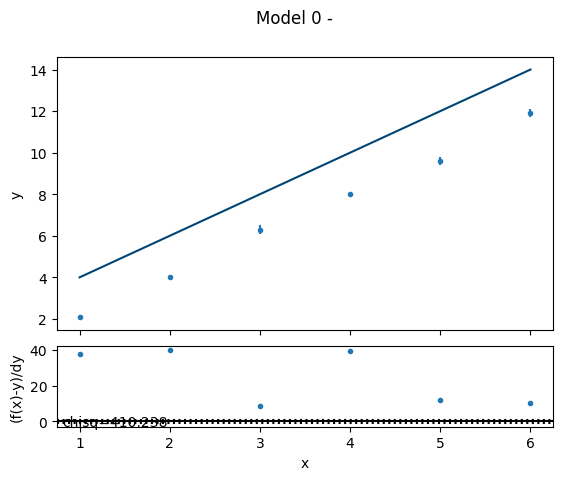

In [2]:
from bumps.names import *

x = [1, 2, 3, 4, 5, 6]
y = [2.1, 4.0, 6.3, 8.03, 9.6, 11.9]
dy = [0.05, 0.05, 0.2, 0.05, 0.2, 0.2]

def line(x, m, b=0):
    return m*x + b

M = Curve(line, x, y, dy, m=2, b=2)
M.m.range(0, 4)
M.b.range(-5, 5)

problem = FitProblem(M)
problem.plot()

In [3]:
from bumps import fitters
options_dict = {}

for item in fitters.__dict__.keys():
    if item.endswith('Fit') and fitters.__dict__[item].id in fitters.FIT_AVAILABLE_IDS:
        options_dict[fitters.__dict__[item].name] = fitters.__dict__[item].id

w_choice_minimizer = ipywidgets.Dropdown(
    options=list(options_dict.keys()),
    value='Levenberg-Marquardt',
    description='Minimizer:',
    layout=ipywidgets.Layout(height='40px'))

w_choice_minimizer

Dropdown(description='Minimizer:', index=4, layout=Layout(height='40px'), options=('Differential Evolution', '…

In [4]:
steps_fitting = ipywidgets.IntText(
    value=100,
    step=100,
    description='Number of steps when fitting',
    style={'description_width': 'initial'})

steps_fitting

IntText(value=100, description='Number of steps when fitting', step=100, style=DescriptionStyle(description_wi…

In [5]:
# Preview of the settings
print('Initial chisq', problem.chisq_str())

Initial chisq 1230.72(57)


In [6]:
result = fitters.fit(
    problem,
    starts=10,
    keep_best=True,
    method=options_dict[w_choice_minimizer.value],
    steps=int(steps_fitting.value)
)

print('Final chisq', problem.chisq_str())

Final chisq 1.76(57)


In [7]:
print(problem.summarize())

                                       b .....|....   0.110551 in (-5, 5)
                                       m ....|.....    1.97017 in (0, 4)


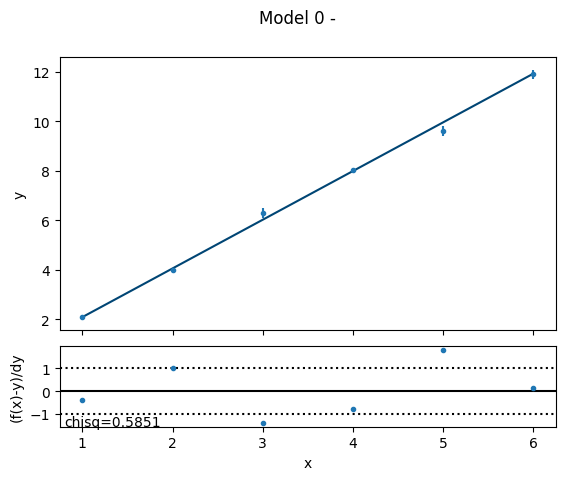

In [8]:
problem.plot()